<a href="https://colab.research.google.com/github/Somita489/Dynamic-pricing/blob/main/pricing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pathway bokeh --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Importing data and required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pathway as pw
import bokeh.plotting
import panel as pn

In [57]:

data=pd.read_csv('dataset.csv')

Understanding the data

In [58]:
data.shape

(18368, 12)

In [93]:
data.columns

Index(['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude',
       'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength',
       'IsSpecialDay', 'LastUpdatedDate', 'LastUpdatedTime'],
      dtype='object')

In [94]:
data['SystemCodeNumber'].unique()

array(['BHMBCCMKT01', 'BHMBCCTHL01', 'BHMEURBRD01', 'BHMMBMMBX01',
       'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a',
       'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

In [95]:
data['Capacity'].unique()

array([ 577,  387,  470,  687, 1200,  485,  690, 2009, 2803, 3883, 2937,
       1322, 3103, 1920])

In [96]:
data['Latitude'].unique()

array([26.14453614, 26.14449459, 26.14901995, 20.0000347 , 26.14001386,
       26.14004753, 26.13795775, 26.14747299, 26.14754061, 26.14749943,
       26.14749053, 26.14754886, 26.14749998, 26.15050395])

In [103]:
data['Occupancy'].unique()

array([  61,   64,   80, ..., 1463, 1510, 1487])

In [102]:
data['VehicleType'].unique()

array([2, 1, 3, 0])

In [101]:
for col in data.columns:
  print(col,':',data[col].nunique())

ID : 18368
SystemCodeNumber : 14
Capacity : 14
Latitude : 14
Longitude : 14
Occupancy : 2347
VehicleType : 4
TrafficConditionNearby : 3
QueueLength : 16
IsSpecialDay : 2
LastUpdatedDate : 73
LastUpdatedTime : 275


In [100]:
for col in ['TrafficConditionNearby','QueueLength','IsSpecialDay']:
  print(col,':',data[col].unique())

TrafficConditionNearby : [-1  1  0]
QueueLength : [ 1  2  3  6  5  8  7  4  9 10  0 11 12 13 14 15]
IsSpecialDay : [0 1]


In [99]:
data['Occupancy'].isna().sum()

np.int64(0)

In [98]:
data['Capacity'].isna().sum()

np.int64(0)

In [97]:
data.columns

Index(['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude',
       'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength',
       'IsSpecialDay', 'LastUpdatedDate', 'LastUpdatedTime'],
      dtype='object')

Encoding string data

In [76]:
# Replace values in 'TrafficConditionNearby'
data['TrafficConditionNearby'] = data['TrafficConditionNearby'].replace({
    'low': -1,
    'average': 0,
    'high': 1
})

# Verify the changes
print(data['TrafficConditionNearby'].unique())

[-1  1  0]


/tmp/ipython-input-76-101646615.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['TrafficConditionNearby'] = data['TrafficConditionNearby'].replace({


In [77]:
data['VehicleType']=data['VehicleType'].replace({
    'cycle':0,
    'bike':1,
    'car':2,
    'truck':3
})
data['VehicleType'].unique()

/tmp/ipython-input-77-2350374409.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['VehicleType']=data['VehicleType'].replace({


array([2, 1, 3, 0])

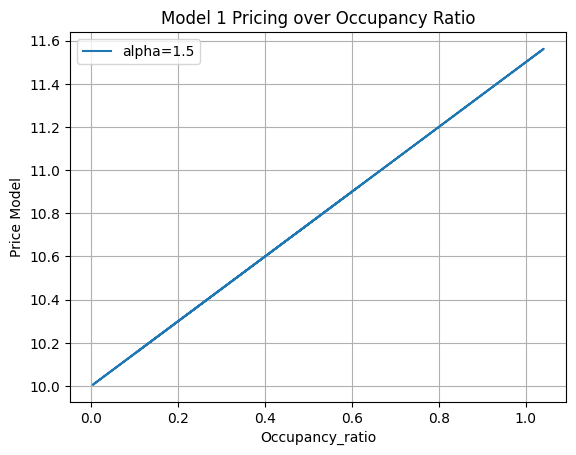

In [78]:
# Building foundation for model 1 and checking for a particular alpha
sample_data = data.copy()

# Compute occupancy ratio
sample_data['occupancy_ratio'] = sample_data['Occupancy'] / sample_data['Capacity']



# Model 1 function
def linear_model_model1(df, alpha=1.0, base_price=10):
    prices = []
    for i in range(0, len(df)):
        new_price = base_price + alpha * df.iloc[i]['occupancy_ratio']
        prices.append(new_price)
    df['price_model'] = prices
    return df

# Run model
alpha = 1.5
result = linear_model_model1(sample_data, alpha)

# Plot
plt.plot(result.occupancy_ratio, result['price_model'], label=f'alpha={alpha}')
plt.xlabel('Occupancy_ratio')
plt.ylabel('Price Model')
plt.title(f'Model 1 Pricing over Occupancy Ratio')
plt.legend()
plt.grid(True)
plt.show()

#Graph shows price increase linearly with occupancy ratio and remains within the range $10-11.6
#Now we can build streaming data to apply it on live stream data

In [79]:
#We build model2 to build a foundation
# Function to normalize a variable to a given range
def normalize_to_range(series, min_target=5, max_target=20):
  min_val = series.min()
  max_val = series.max()

  if max_val == min_val:
    return pd.Series([min_target] * len(series), index=series.index)
  normalized_series = min_target + (series - min_val) * (max_target - min_target) / (max_val - min_val)
  return normalized_series


def model2(dataset, a, b, c, d, e, min_target=5, max_target=20,base_price=10.0):

  prices = []
  for i in range(len(dataset)):
    row = dataset.iloc[i]
    # Calculate the raw demand value
    raw_demand = (a*row.occupancy_ratio)+(b*row.VehicleType)+(c*row.QueueLength)+(d*row.IsSpecialDay)+(e*row.TrafficConditionNearby)
    price=base_price*(1+raw_demand)
    prices.append(price)

  # Convert demands list to a pandas Series
  prices= pd.Series(prices, index=dataset.index)

  # Normalize the demand series to the target range
  normalized_price = normalize_to_range(prices, min_target, max_target)

  dataset['normalized_price'] = normalized_price

  return dataset
  #Now we will determine suitable values of a,b,c,d,e by plotting the price against the various features used

IsSpecialDay testing

/tmp/ipython-input-81-732421893.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


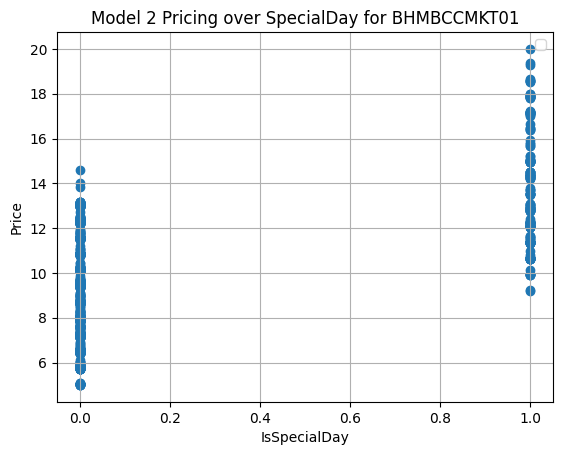

/tmp/ipython-input-81-732421893.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


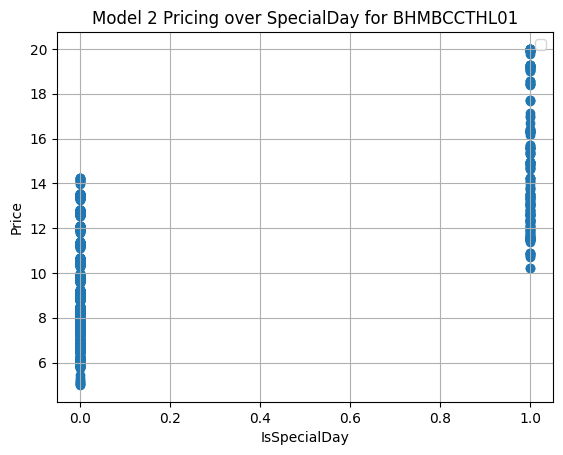

/tmp/ipython-input-81-732421893.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


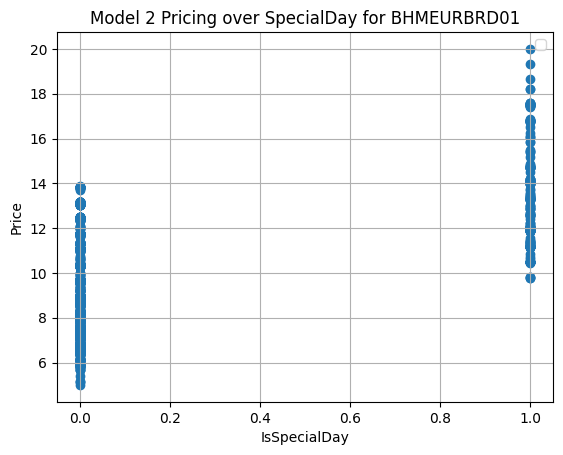

/tmp/ipython-input-81-732421893.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


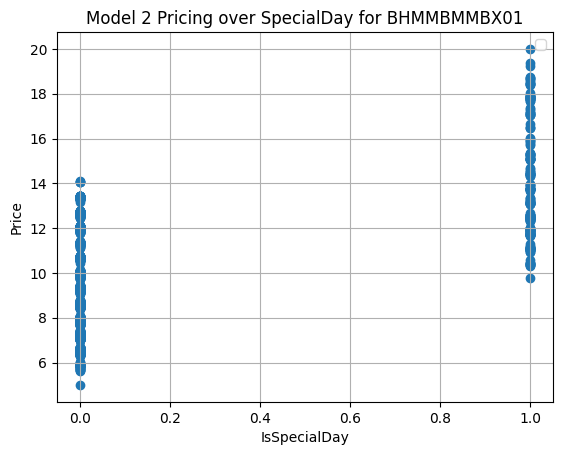

/tmp/ipython-input-81-732421893.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


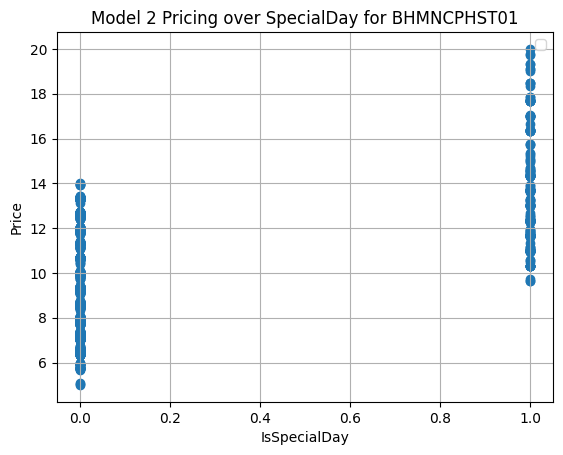

/tmp/ipython-input-81-732421893.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


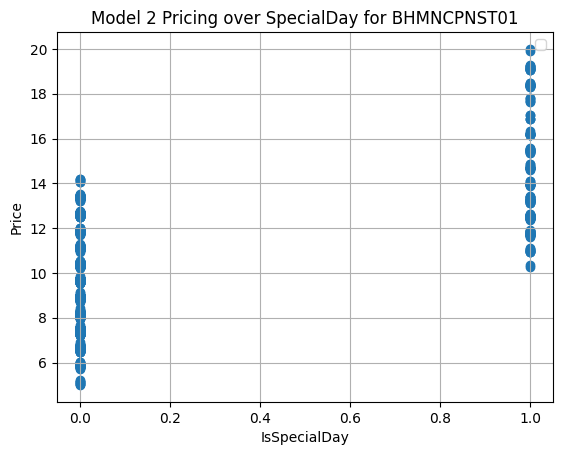

/tmp/ipython-input-81-732421893.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


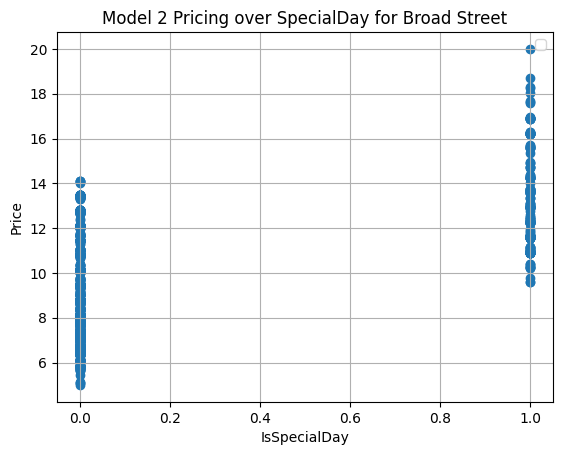

/tmp/ipython-input-81-732421893.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


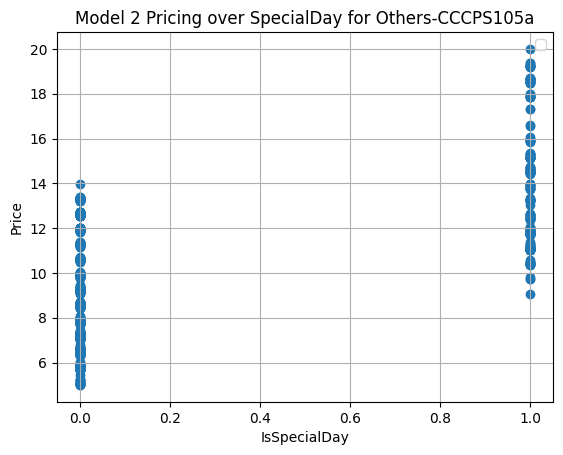

/tmp/ipython-input-81-732421893.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


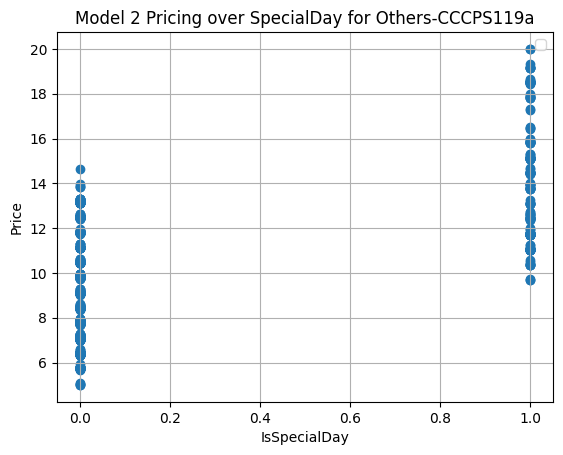

/tmp/ipython-input-81-732421893.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


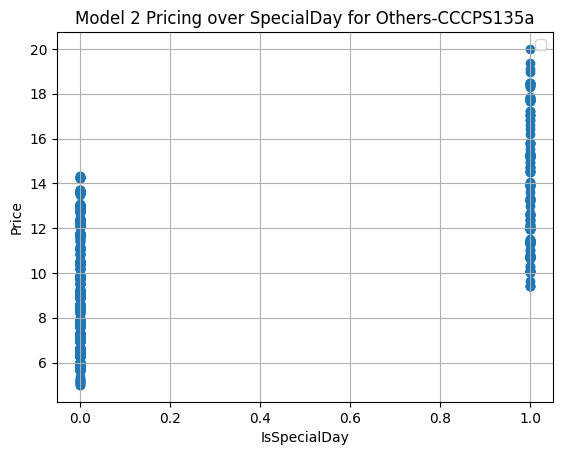

/tmp/ipython-input-81-732421893.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


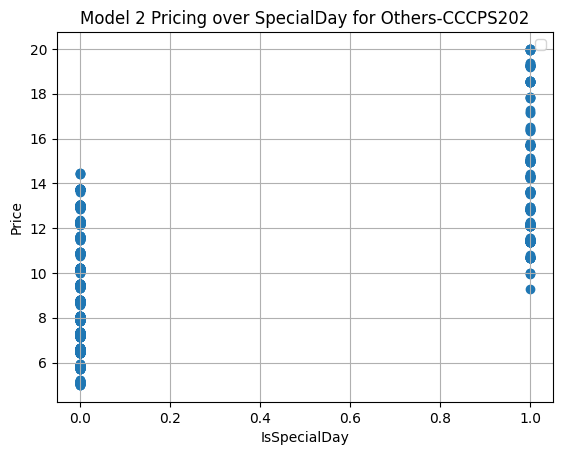

/tmp/ipython-input-81-732421893.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


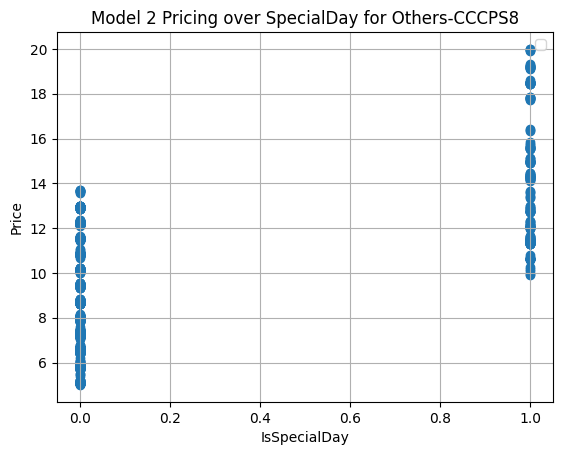

/tmp/ipython-input-81-732421893.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


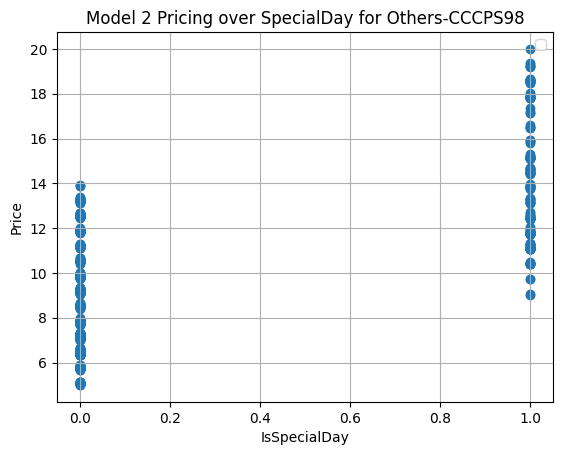

/tmp/ipython-input-81-732421893.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


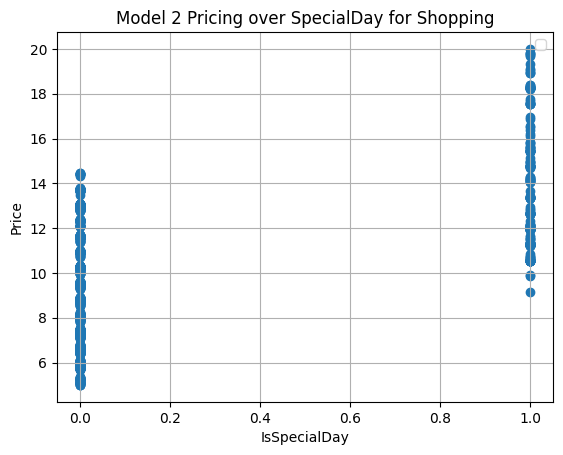

In [81]:
for code in sample_data['SystemCodeNumber'].unique():

  sample_df = sample_data[sample_data['SystemCodeNumber'] == code].copy()

  result=model2(sample_df,0.1,0.1,0.1,0.6,0.1)
  plt.scatter(result.IsSpecialDay,result.normalized_price)
  plt.xlabel('IsSpecialDay')
  plt.ylabel('Price')
  plt.title(f'Model 2 Pricing over SpecialDay for {code}')
  plt.legend()
  plt.grid(True)
  plt.show()
  plt.show()

QueueLength testing

/tmp/ipython-input-88-61639723.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


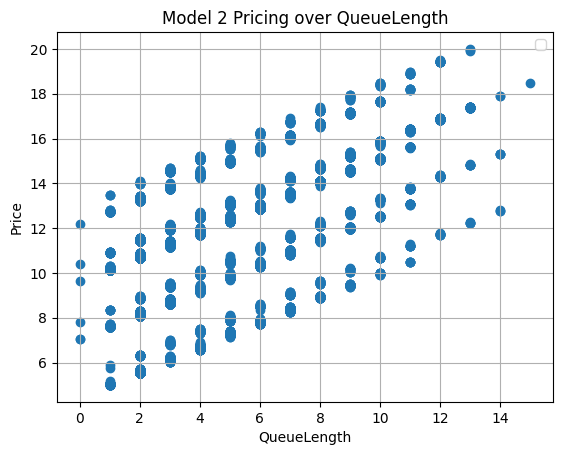

In [88]:

c='QueueLength'
result=model2(sample_data,0.1,2.0,0.4,0.6,0.1)
plt.scatter(result[c],result.normalized_price)
plt.xlabel(c)
plt.ylabel('Price')
plt.title(f'Model 2 Pricing over {c}')
plt.legend()
plt.grid(True)
plt.show()

Vehicle Type testing

/tmp/ipython-input-91-4233421993.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


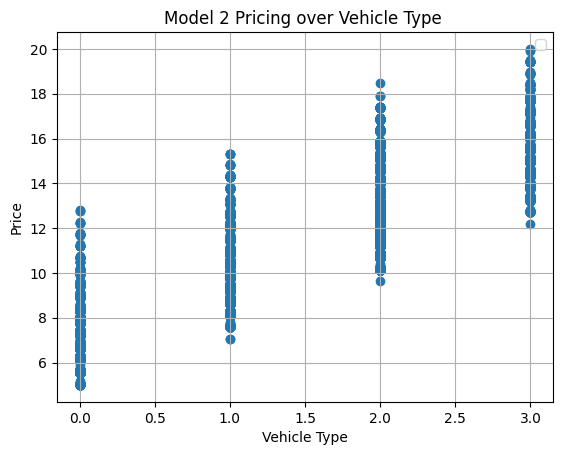

In [91]:
# Vehicles have been encoded according to their weight and complexity as:
# cycle:0
# bike :1
# car :2
# truck:3
# This has been done so that cycles have to pay least parking fee and trucks the most
result=model2(sample_data,0.1,2.0,0.4,0.6,0.1)
plt.scatter(result.VehicleType,result.normalized_price)
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.title(f'Model 2 Pricing over Vehicle Type ')
plt.legend()
plt.grid(True)
plt.show()

Occupancy ratio testing

/tmp/ipython-input-92-3398657934.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


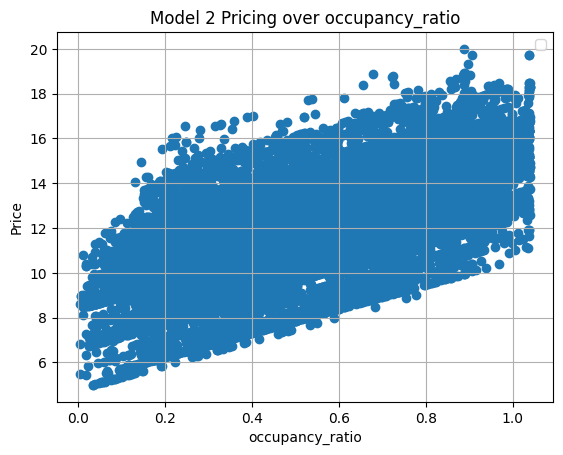

In [92]:
c='occupancy_ratio'
result=model2(sample_data,6.0,2.0,0.4,0.6,0.1)
plt.scatter(result[c],result.normalized_price)
plt.xlabel(c)
plt.ylabel('Price')
plt.title(f'Model 2 Pricing over {c}')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-106-777476502.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


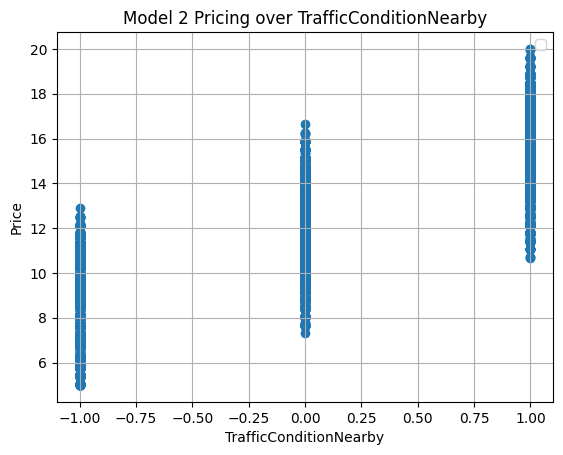

In [106]:
#Traffic conditions have been encoded as:
# low:-1
# medium:0
# high:1
# This ensures parking fee varies according to the traffic conditions reasonably.
c='TrafficConditionNearby'
result=model2(sample_data,0.1,2.0,0.4,0.6,2.5)
plt.scatter(result[c],result.normalized_price)
plt.xlabel(c)
plt.ylabel('Price')
plt.title(f'Model 2 Pricing over {c}')
plt.legend()
plt.grid(True)
plt.show()

Now we have built the foundations for model 1 and 2, we can build live stream of data using pathway and use these weights to apply in our model.

Creating stream of data

In [8]:
# Combine the 'LastUpdatedDate' and 'LastUpdatedTime' columns into a single datetime column
data['Timestamp'] = pd.to_datetime(data['LastUpdatedDate'] + ' ' +
                                   data['LastUpdatedTime'],
                                  format='%d-%m-%Y %H:%M:%S')
data.columns

Index(['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude',
       'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength',
       'IsSpecialDay', 'LastUpdatedDate', 'LastUpdatedTime', 'Timestamp'],
      dtype='object')

In [107]:


# Load CSV using pandas
df = pd.read_csv("parking_stream.csv")

# Combine date and time columns
df["Timestamp"] = pd.to_datetime(
    df["LastUpdatedDate"] + " " + df["LastUpdatedTime"],
    format="%d-%m-%Y %H:%M:%S"
)

# Sort by timestamp and save
df = df.sort_values("Timestamp").reset_index(drop=True)
df.to_csv("parking_stream_sorted.csv", index=False)


In [108]:



# Define the schema for the streaming data using Pathway
# This schema specifies the expected structure of each data row in the stream

class ParkingSchema(pw.Schema):
    ID: str
    SystemCodeNumber: str
    VehicleType: float
    TrafficConditionNearby: float
    QueueLength: float
    IsSpecialDay: float
    Latitude: float  # Latitude coordinate of the parking location
    Longitude: float # Longitude coordinate of the parking location
    Timestamp: str   # Timestamp of the observation
    Occupancy: float   # Number of occupied parking spots
    Capacity: float    # Total parking capacity at the location

# Load the data as a simulated stream using Pathway's replay_csv function
# This replays the CSV data at a controlled input rate to mimic real-time streaming
# input_rate=1 means approximately 1 row per second will be ingested into the stream.
# This approach will be better as the pricing will be more customised and suited according to the vehicle type and traffic conditions nearby and space available.

data = pw.demo.replay_csv("parking_stream_sorted.csv", schema=ParkingSchema, input_rate=1)

# Define the datetime format to parse the 'Timestamp' column
fmt = "%Y-%m-%d %H:%M:%S"

# Add new columns to the data stream:
# - 't' contains the parsed full datetime
# - 'day' extracts the date part and resets the time to midnight (useful for day-level aggregations)
data_with_time = data.with_columns(
    t = data.Timestamp.dt.strptime(fmt),
    day = data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00")
)




Model 1- Linear Model based on occupancy and capacity

In [110]:
# Define a daily tumbling window over the data stream using Pathway
# This block performs temporal aggregation and computes a dynamic price for each day
import datetime

delta_window = (
    data_with_time
    .with_columns(
        # Compute the price using a simple dynamic pricing formula:
        #
        # Pricing Formula:
        #     price = base_price + demand_fluctuation
        #     where:
        #         base_price = 10 (fixed minimum price)
        #         demand_fluctuation = (occ_max - occ_min) / cap
        #
        # Intuition:
        # - Changing price according to the  Occupancy / Capacity at that time is a better appraoch as it takes into account real time expectations , rather than taking it for a single day.
        # - This approach is more simple and also reasonable.
        # - Dividing by capacity normalizes the fluctuation (to stay in [0,1] range).
        # - This fluctuation is added to the base price of 10 to set the final price.

        price=10 + (pw.this.Occupancy) / pw.this.Capacity
    )
)

In [111]:
# Activate the Panel extension to enable interactive visualizations
pn.extension()

# Define a custom Bokeh plotting function that takes a data source (from Pathway) and returns a figure
def price_plotter(source):
    # Create a Bokeh figure with datetime x-axis
    fig = bokeh.plotting.figure(
        height=400,
        width=800,
        title="Pathway: Daily Parking Price",
        x_axis_type="datetime",  # Ensure time-based data is properly formatted on the x-axis
    )
    # Plot a line graph showing how the price evolves over time
    fig.line("t", "price", source=source, line_width=2, color="navy")

    # Overlay red circles at each data point for better visibility
    fig.circle("t", "price", source=source, size=6, color="red")

    return fig

# Use Pathway's built-in .plot() method to bind the data stream (delta_window) to the Bokeh plot
# - 'price_plotter' is the rendering function
# - 'sorting_col="t"' ensures the data is plotted in time order
viz = delta_window.plot(price_plotter, sorting_col="t")


# This line enables the interactive plot to be displayed when the app is served
pn.Column(viz).servable()

Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [ ]:
pw.run()

Model 2

In [114]:
# Function to normalize a variable to a given range
def normalize_to_range(series, min_target=5, max_target=20):
  min_val = series.min()
  max_val = series.max()
  # Avoid division by zero if all values are the same
  if max_val == min_val:
    return pd.Series([min_target] * len(series), index=series.index)
  normalized_series = min_target + (series - min_val) * (max_target - min_target) / (max_val - min_val)
  return normalized_series



def model2(dataset, a, b, c, d, e, min_target=5, max_target=20,base_price=10.0):

  prices = []
  for i in range(len(dataset)):
    row = dataset.iloc[i]
    # Calculate the raw demand value
    raw_demand = (a*row.ratio)+(b*row.VehicleType)+(c*row.QueueLength)+(d*row.IsSpecialDay)+(e*row.TrafficConditionNearby)
    price=base_price*(1+raw_demand)
    prices.append(price)

  # Convert demands list to a pandas Series for easy normalization
  prices= pd.Series(prices, index=dataset.index)

  # Normalize the demand series to the target range
  normalized_price = normalize_to_range(prices, min_target, max_target)

  # add this normalized demand back to your dataset
  dataset['normalized_price'] = normalized_price

  return dataset

In [115]:


# Define weights for raw_demand formula
#These weights have been decided by building a function and testing it on static data and the plots have been given above for reference
a = 0.1
b = 2.0
c = 0.4
d = 0.6
e = 2.5

delta_window = (
    data_with_time.with_columns(

        price=10 +  a *( (pw.this.Occupancy) / pw.this.Capacity) +
            b * pw.this.VehicleType +
            c * pw.this.QueueLength +
            d * pw.this.IsSpecialDay +
            e * pw.this.TrafficConditionNearby
    )
)


In [116]:
# Activate the Panel extension to enable interactive visualizations
pn.extension()

# Define a custom Bokeh plotting function that takes a data source (from Pathway) and returns a figure
def price_plotter(source):
    # Create a Bokeh figure with datetime x-axis
    fig = bokeh.plotting.figure(
        height=400,
        width=800,
        title="Pathway: Real time Parking Price",
        x_axis_type="datetime",  # Ensure time-based data is properly formatted on the x-axis
    )
    # Plot a line graph showing how the price evolves over time
    fig.line("t", "price", source=source, line_width=2, color="navy")

    # Overlay red circles at each data point for better visibility
    fig.circle("t", "price", source=source, size=6, color="red")

    return fig

# Use Pathway's built-in .plot() method to bind the data stream (delta_window) to the Bokeh plot
# - 'price_plotter' is the rendering function
# - 'sorting_col="t"' ensures the data is plotted in time order
viz = delta_window.plot(price_plotter, sorting_col="t")

# Create a Panel layout and make it servable as a web app
# This line enables the interactive plot to be displayed when the app is served
pn.Column(viz).servable()

Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [ ]:
pw.run()